In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d=pd.read_csv("titanic_train.csv")
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
d.shape

(891, 12)

In [4]:
d.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

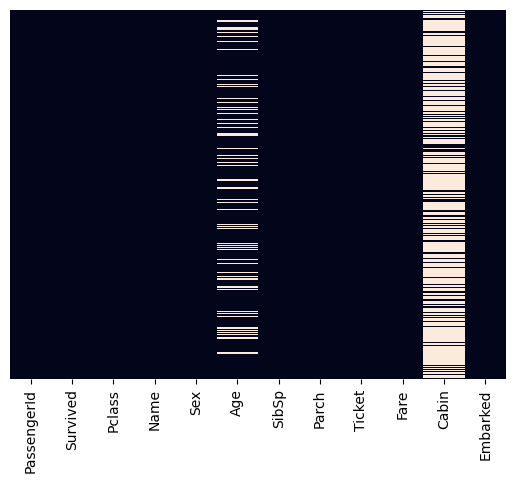

In [5]:
sns.heatmap(d.isnull(),yticklabels=False,cbar=False)

In [6]:
d.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
d.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
d['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

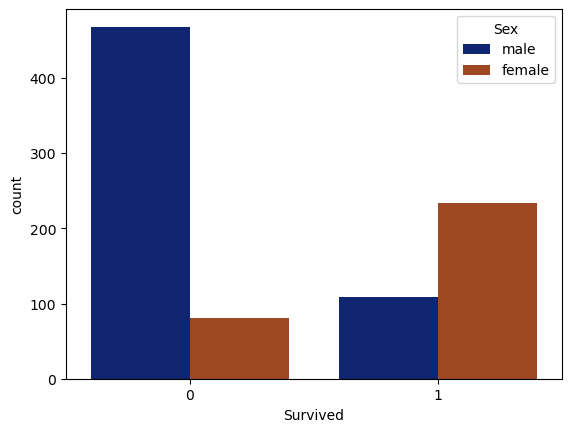

In [9]:
# sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Sex',data=d,palette='dark')

In [10]:
d['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

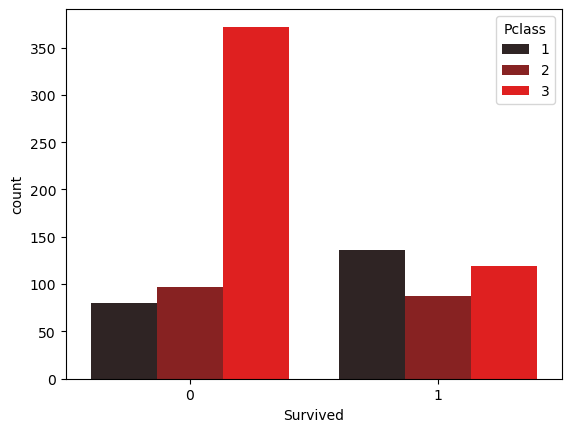

In [11]:
# sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=d,palette='dark:red')

In [12]:
d['Age'].median()

28.0

In [13]:
d['Age']=d['Age'].fillna(d['Age'].median())

In [14]:
d.drop(['Cabin'],axis=1,inplace=True)

In [15]:
d['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
d['Embarked']=d['Embarked'].fillna('S')

In [17]:
d.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
d.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [19]:
Sex_map={'male':0,'female':1}
d['Sex']=d['Sex'].map(Sex_map)

In [20]:
embark=pd.get_dummies(d["Embarked"],drop_first=True,dtype=int)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [21]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [22]:
d=pd.concat([d,embark],axis=1)

In [23]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,1


In [24]:
d.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Q                int32
S                int32
dtype: object

In [25]:
d=d.drop(['Name','Ticket','Embarked'],axis=1)
d.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,0,22.0,1,0,7.2500,0,1
1,2,1,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,1


In [26]:
d.shape

(891, 10)

In [27]:
x=d.drop(['Survived'],axis=1)
y=d['Survived']

In [28]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,3,0,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,35.0,1,0,53.1000,0,1
4,5,3,0,35.0,0,0,8.0500,0,1


In [29]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [31]:
from sklearn.linear_model import LogisticRegression
M=LogisticRegression()
M.fit(x_train,y_train)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred=M.predict(x_test)

In [33]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [91]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,auc

#cofusion Matrix

In [36]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[180,  36],
       [ 40, 101]], dtype=int64)

<Axes: >

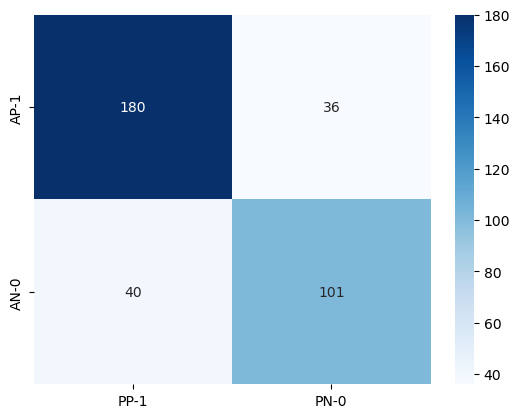

In [37]:
cm_data=pd.DataFrame(cm,columns=['PP-1','PN-0'],index=['AP-1','AN-0'])
sns.heatmap(cm_data,annot=True,cmap='Blues',fmt='d')

In [38]:
TP=cm[0,0]
FN=cm[0,1]
FP=cm[1,0]
TN=cm[1,1]

Accuracy

In [40]:
Accuracy=accuracy_score(y_test,y_pred)
Accuracy

0.7871148459383753

Classification Report

In [42]:
c_r=classification_report(y_test,y_pred)
print(c_r)

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       216
           1       0.74      0.72      0.73       141

    accuracy                           0.79       357
   macro avg       0.78      0.77      0.78       357
weighted avg       0.79      0.79      0.79       357



Threshold

In [44]:
#True positive rate
TPR=TP/float(TP+FN)
TPR

0.8333333333333334

In [45]:
#False positive rate
FPR=FP/float(FP+TN)
FPR

0.28368794326241137

In [103]:
y_pred_prob=M.predict_proba(x_test)[:,1]
y_pred_prob

array([0.64849317, 0.69839024, 0.1841443 , 0.92165129, 0.1358888 ,
       0.140864  , 0.14751054, 0.12885041, 0.22411131, 0.1780365 ,
       0.82156582, 0.66924747, 0.27901657, 0.16714295, 0.83866923,
       0.19385735, 0.14021895, 0.16389026, 0.6828187 , 0.85516183,
       0.13427319, 0.25747422, 0.09969101, 0.16916216, 0.07172453,
       0.84575099, 0.62965996, 0.3553422 , 0.09773597, 0.28890572,
       0.16118789, 0.59429905, 0.34293168, 0.25455863, 0.57075482,
       0.26849504, 0.16986963, 0.10697901, 0.30249105, 0.41700395,
       0.21071467, 0.15118091, 0.28461229, 0.07880673, 0.69566619,
       0.09403736, 0.76818011, 0.10958743, 0.75623124, 0.15109363,
       0.06658529, 0.81568655, 0.84169997, 0.59590963, 0.64132074,
       0.10810158, 0.54230692, 0.84349554, 0.69203609, 0.09667644,
       0.23690969, 0.18044592, 0.73891153, 0.97318672, 0.94250622,
       0.46077793, 0.10338004, 0.1158206 , 0.15229407, 0.11990002,
       0.24900144, 0.6540781 , 0.15112273, 0.53783679, 0.60229

In [105]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

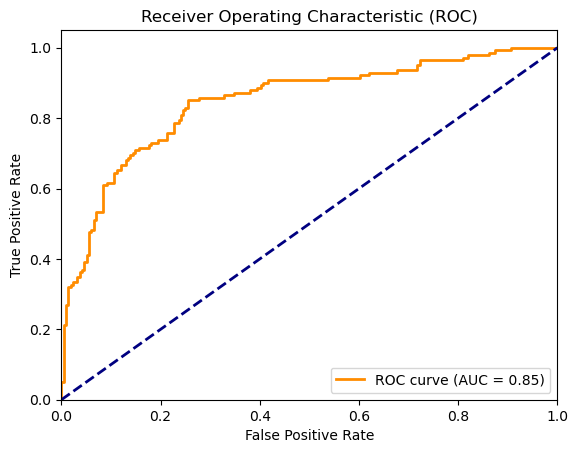

In [111]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()